In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
# N=20取bin的函数

def databin_20(lst):
    result = [[]]
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(lst[i])
        n = n+1
        if n == 20:
            n = 0
            result.append([])
    output=[]
    for j in range(len(result)):
        output.append(np.mean(result[j])) 
    return output

def databin_20_std(lst):
    result = [[]]
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(lst[i])
        n = n+1
        if n == 20:
            n = 0
            result.append([])        
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j])) 
    return output


In [3]:
#光变曲线

# 提取数据长度
data = pd.read_csv("0.3_10_final.csv")  
counts_data = data['RATE']
dt=200
mean_x_data = np.mean(counts_data)

N=len(counts_data)
N_randomlc=len(counts_data)

omega = []
POW = []
DFT = []
fr = []
fi = []
f1 = []
f2 = []
p = []
f = []


counts_list=[None for i in range(500)]

# 500条光变曲线
for a in range(500):
    f_b=1.7E-4
    alpha_H=3.8
    alpha_L=1.0
    for j in range(1,int(N_randomlc)+1):
        omega.append(j/(N_randomlc*dt))
        POW.append(((omega[-1]**(-alpha_L))/(1+(omega[-1]/f_b)**(alpha_H-alpha_L)))*0.005)
        DFT.append(complex(np.sqrt(POW[-1]),np.sqrt(POW[-1])))
        s1=np.random.normal(loc=0.0, scale=1.0, size=None)
        s2=np.random.normal(loc=0.0, scale=1.0, size=None)
        fr.append((DFT[-1].real)*s1)
        fi.append((DFT[-1].imag)*s2)
        f1.append(complex(fr[-1],fi[-1]))
    counts = ifft(f1)
    counts_list[a]=counts





'''
pnum = np.arange(len(counts))
t = [i*dt for i in pnum]


plt.figure(figsize=(10,8))
plt.plot(t,counts,'b')
plt.xlabel("time")
plt.ylabel("counts")
plt.title("lightcurve")
plt.show() 
'''

'\npnum = np.arange(len(counts))\nt = [i*dt for i in pnum]\n\n\nplt.figure(figsize=(10,8))\nplt.plot(t,counts,\'b\')\nplt.xlabel("time")\nplt.ylabel("counts")\nplt.title("lightcurve")\nplt.show() \n'

In [4]:

# ????    
# 可以直接在光变曲线上乘上数据光变曲线的平均值，相当于加上泊松噪声    


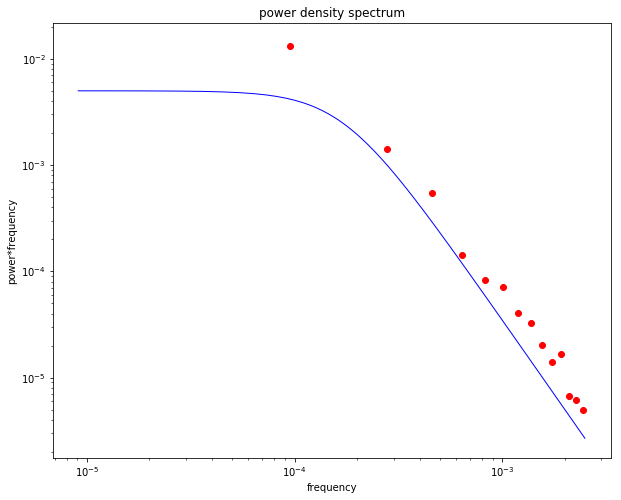

In [5]:
#周期图

per_list=[None for i in range(500)]

for a in range(500):
    nf = N/2
    df = 1/(dt*N)
    F_a = np.arange(1,nf+1)
    F = [i*df for i in F_a]
    F1 = F[0:int(nf)]
    mean_x = np.mean(counts_list[a])
    x_new  = [i-mean_x for i in counts_list[a]]
    dft   = fft(counts_list[a])
    dft_1 = dft[1:int(nf)+1]
    per = (abs(dft_1)**2)

    per_list[a] = per


    
# 500条周期图取 mean,std
per_everypoint_list=[]
for i in range(int(nf)):
    per_everypoint_list.append([])
ADM=[]
ADM_std=[]
for m in range(int(nf)):
    for n in range(500):
        per_everypoint_list[m].append(per_list[n][m])
        
for m in range(int(nf)):
    ADM.append(np.mean(per_everypoint_list[m]))
    ADM_std.append(np.std(per_everypoint_list[m]))    

    
'''
# 生成的光变曲线的均值
mean_list=[]
for a in range(500):
    mean_list.append(np.mean(counts_list[a]))
mean_x_fit=np.mean(mean_list)
'''
    

ADM_times_f = np.multiply(np.array(F),np.array(ADM))
        
        
POW1=POW[0:int(nf)]
P_TIMES_F = np.multiply(np.array(F),np.array(POW1))



# ADM取bin
ADM_binned=databin_20(ADM)
ADM_binned_std=databin_20_std(ADM)
F1_binned=databin_20(F1)
ADM_times_f_binned=np.multiply(np.array(F1_binned),np.array(ADM_binned))



plt.figure(figsize=(10,8))
plt.loglog(F,P_TIMES_F,color="b",linewidth=1)
plt.scatter(F1_binned,ADM_times_f_binned,color="r",linewidth=1)    
plt.xlabel("frequency")
plt.ylabel("power*frequency")
plt.title("power density spectrum")
plt.show()

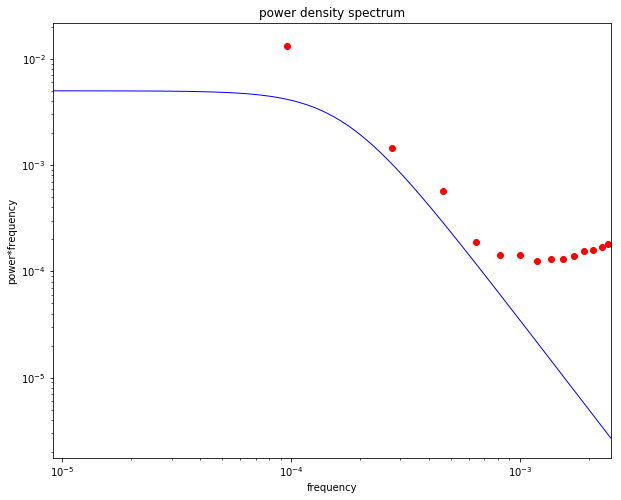

In [6]:
# 加上泊松项？
ADM_with_poisson = [i+2/mean_x_data for i in ADM]


ADM_times_f_ps = np.multiply(np.array(F),np.array(ADM_with_poisson))
        
        
POW1=POW[0:int(nf)]
P_TIMES_F = np.multiply(np.array(F),np.array(POW1))

#加上泊松项并分bin
ADM_binned_ps = databin_20(ADM_with_poisson)
F1_binned = databin_20(F1)
ADM_times_f_b_ps = np.multiply(np.array(F1_binned),np.array(ADM_binned_ps))


plt.figure(figsize=(10,8))
plt.loglog(F,P_TIMES_F,color="b",linewidth=1)
plt.scatter(F1_binned,ADM_times_f_b_ps,color="r",linewidth=1)  
plt.xlim(F[0],F[-1]) 
plt.xlabel("frequency")
plt.ylabel("power*frequency")
plt.title("power density spectrum")
plt.show()

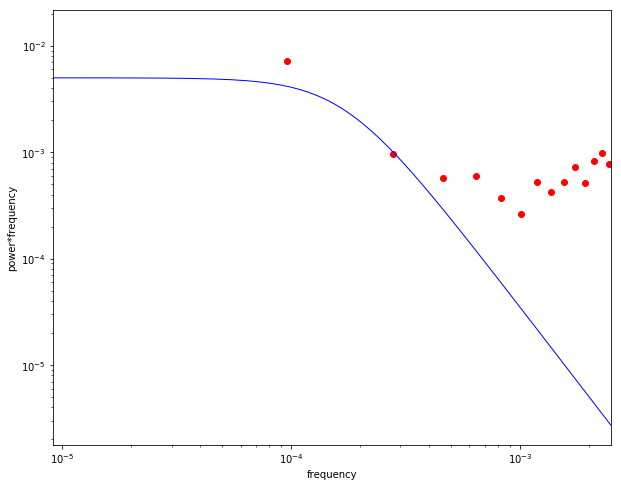

In [7]:
# 从数据得到参考周期图

data = pd.read_csv("0.3_10_final.csv")  

dt=200
counts_data = data['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]

'''
plt.figure(figsize=(10,8))
plt.plot(t,counts_data,'b')
plt.xlabel("TIME(s)")
plt.ylabel("RATE(coount/s)")
plt.title("lightcurve")
plt.show()    
'''

nf = N/2
df = 1/(dt*N)
F_num = np.arange(1,nf)
F = [i*df for i in F_num]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F),np.array(per_data))



# 数据分bin
per_data_binned = databin_20(per_data)
per_data_b_std = databin_20_std(per_data)
p_times_f_data_b = np.multiply(np.array(F1_binned),np.array(per_data_binned))



f_b=1.7E-4
alpha_H=3.8
alpha_L=1.0
P = [((i**(-alpha_L))/(1+(i/f_b)**(alpha_H-alpha_L)))*0.005 for i in F]

P_TIMES_F = np.multiply(np.array(F),np.array(P))


plt.figure(figsize=(10,8))
plt.scatter(F1_binned,p_times_f_data_b,color="r",linewidth=1) 
plt.loglog(F,P_TIMES_F,color="b",linewidth=1)  
plt.xlim(F[0],F[-1]) 
plt.xlabel("frequency")
plt.ylabel("power*frequency")
plt.show()

In [8]:
# chi2 =（每一点500平均值 - 每一点数据得到）/ 每一点的500标准差  求和

chi2=0
for i in range(len(ADM_binned_ps)):
    chi2 = chi2+(((ADM_binned_ps[i]-per_data_binned[i])/per_data_b_std[i])**2)

print (chi2)


9.055505151251152


In [9]:
def chi2_of_model(A):
    data = pd.read_csv("0.3_10_final.csv")  
    counts_data = data['RATE']
    dt=200
    mean_x_data = np.mean(counts_data)
    N=len(counts_data)
    N_randomlc=len(counts_data)
    
    omega = []
    POW = []
    DFT = []
    fr = []
    fi = []
    f1 = []
    f2 = []
    p = []
    f = []
    
    counts_list=[None for i in range(500)]
    
    
    # 500条光变曲线
    for a in range(500): 
        f_b=1.7E-4
        alpha_H=3.8
        alpha_L=1.0
        for j in range(1,int(N_randomlc)+1):
            omega.append(j/(N_randomlc*dt))
            POW.append(((omega[-1]**(-alpha_L))/(1+(omega[-1]/f_b)**(alpha_H-alpha_L)))*A)
            DFT.append(complex(np.sqrt(POW[-1]),np.sqrt(POW[-1])))
            s1=np.random.normal(loc=0.0, scale=1.0, size=None)
            s2=np.random.normal(loc=0.0, scale=1.0, size=None)
            fr.append((DFT[-1].real)*s1)
            fi.append((DFT[-1].imag)*s2)
            f1.append(complex(fr[-1],fi[-1]))
        counts = ifft(f1)
        counts_list[a]=counts
    
    
    #周期图
    per_list=[None for i in range(500)]
    for a in range(500):
        nf = N/2 
        df = 1/(dt*N)
        F_a = np.arange(1,nf+1)
        F = [i*df for i in F_a]
        F1 = F[0:int(nf)]
        mean_x = np.mean(counts_list[a])
        x_new  = [i-mean_x for i in counts_list[a]]
        dft   = fft(counts_list[a])
        dft_1 = dft[1:int(nf)+1]
        per = (abs(dft_1)**2)
        per_list[a] = per
    
    
    # 500条周期图取 mean,std
    per_everypoint_list=[]
    for i in range(int(nf)):
        per_everypoint_list.append([])
    ADM=[]
    ADM_std=[]
    for m in range(int(nf)):
        for n in range(500):
            per_everypoint_list[m].append(per_list[n][m])
        
    for m in range(int(nf)):
        ADM.append(np.mean(per_everypoint_list[m]))
        ADM_std.append(np.std(per_everypoint_list[m]))    
    

    ADM_times_f = np.multiply(np.array(F),np.array(ADM))
        
        
    POW1=POW[0:int(nf)]
    P_TIMES_F = np.multiply(np.array(F),np.array(POW1))
    
    ADM_with_poisson = [i+2/mean_x_data for i in ADM]
    ADM_times_f_ps = np.multiply(np.array(F),np.array(ADM_with_poisson))
    
    
    #加上泊松项并分bin
    ADM_binned_ps = databin_20(ADM_with_poisson)
    F1_binned = databin_20(F1)
    ADM_times_f_b_ps = np.multiply(np.array(F1_binned),np.array(ADM_binned_ps))
    
    
    # 从数据得到参考周期图
    pnum = np.arange(len(counts_data))
    t = [i*dt for i in pnum]
    
    nf = N/2
    df = 1/(dt*N)
    F_num = np.arange(1,nf)
    F = [i*df for i in F_num]
    mean_x = np.mean(counts_data)
    dft = fft(counts_data)
    dft1= dft[1:int(nf)]
    per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
    p_times_f = np.multiply(np.array(F),np.array(per_data))
    
    
    # 数据分bin
    per_data_binned = databin_20(per_data)
    per_data_b_std = databin_20_std(per_data)
    p_times_f_data_b = np.multiply(np.array(F1_binned),np.array(per_data_binned))
    
    
    chi2=0
    for i in range(len(ADM_binned_ps)):
        chi2 = chi2+(((ADM_binned_ps[i]-per_data_binned[i])/per_data_b_std[i])**2)    
    
    print(chi2)
    
    return (chi2)

In [10]:
print(chi2_of_model(0.005))

12.207240783130072
12.207240783130072


In [11]:
print (minimize(chi2_of_model,0.005,method='L-BFGS-B'))

19.253391315298245
11.00692718438995
279768.5472931967
557906.3175435072
178350.82251395998
274697.59843549645
180505.20727074338
38416.50440218632
16.34907911072637
14.438677594948217
15.557856005116065
11.895601419845317
11.912500245651493
10.354790808182328
13.419398683817244
11.338535510307516
16.401835635782007
8.828220015382744
9.253184225394289
8.785978118784701
10.963913818013703
12.39060759646039
11.01282213947585
10.515050578761091
9.990345127444153
8.920887870669604
10.768495598139074
8.128296368643554
9.042885465619811
11.957274835396507
12.123611117981692
15.048944924008936
11.465474941940558
9.211967290593217
      fun: 11.465474941940558
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.25350765e+08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 34
      nit: 4
   status: 0
  success: True
        x: array([0.0050053])
